---
title: 머신러닝 소개 및 개요
---

## 0. 노트북 환경 설정

### 노트북 환경 설정

In [1]:
%config InlineBackend.figure_format='retina'

### 패키지 설정 불러오기

In [2]:
from preamble import *

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## 1. 데이터 적재

In [4]:
iris_dataset = load_iris()

### 데이터 확인

In [5]:
print("iris_dataset의 키:\n", iris_dataset.keys())

iris_dataset의 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
print(iris_dataset["DESCR"][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


In [7]:
print("타깃의 이름:", iris_dataset["target_names"])

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [8]:
print("특성의 이름:\n", iris_dataset["feature_names"])

특성의 이름:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
print("data의 타입:", type(iris_dataset["data"]))

data의 타입: <class 'numpy.ndarray'>


In [10]:
print("data의 크기:", iris_dataset["data"].shape)

data의 크기: (150, 4)


In [11]:
print("data의 처음 다섯 행:\n", iris_dataset["data"][:5])

data의 처음 다섯 행:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [12]:
print("target의 타입:", type(iris_dataset["target"]))

target의 타입: <class 'numpy.ndarray'>


In [13]:
print("target의 크기:", iris_dataset["target"].shape)

target의 크기: (150,)


In [14]:
print("타깃:\n", iris_dataset["target"])

타깃:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 2. 데이터 나누기

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset["data"], iris_dataset["target"], random_state=42
)

In [16]:
print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)

X_train 크기: (112, 4)
y_train 크기: (112,)


In [17]:
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_test 크기: (38, 4)
y_test 크기: (38,)


### 데이터 살펴보기

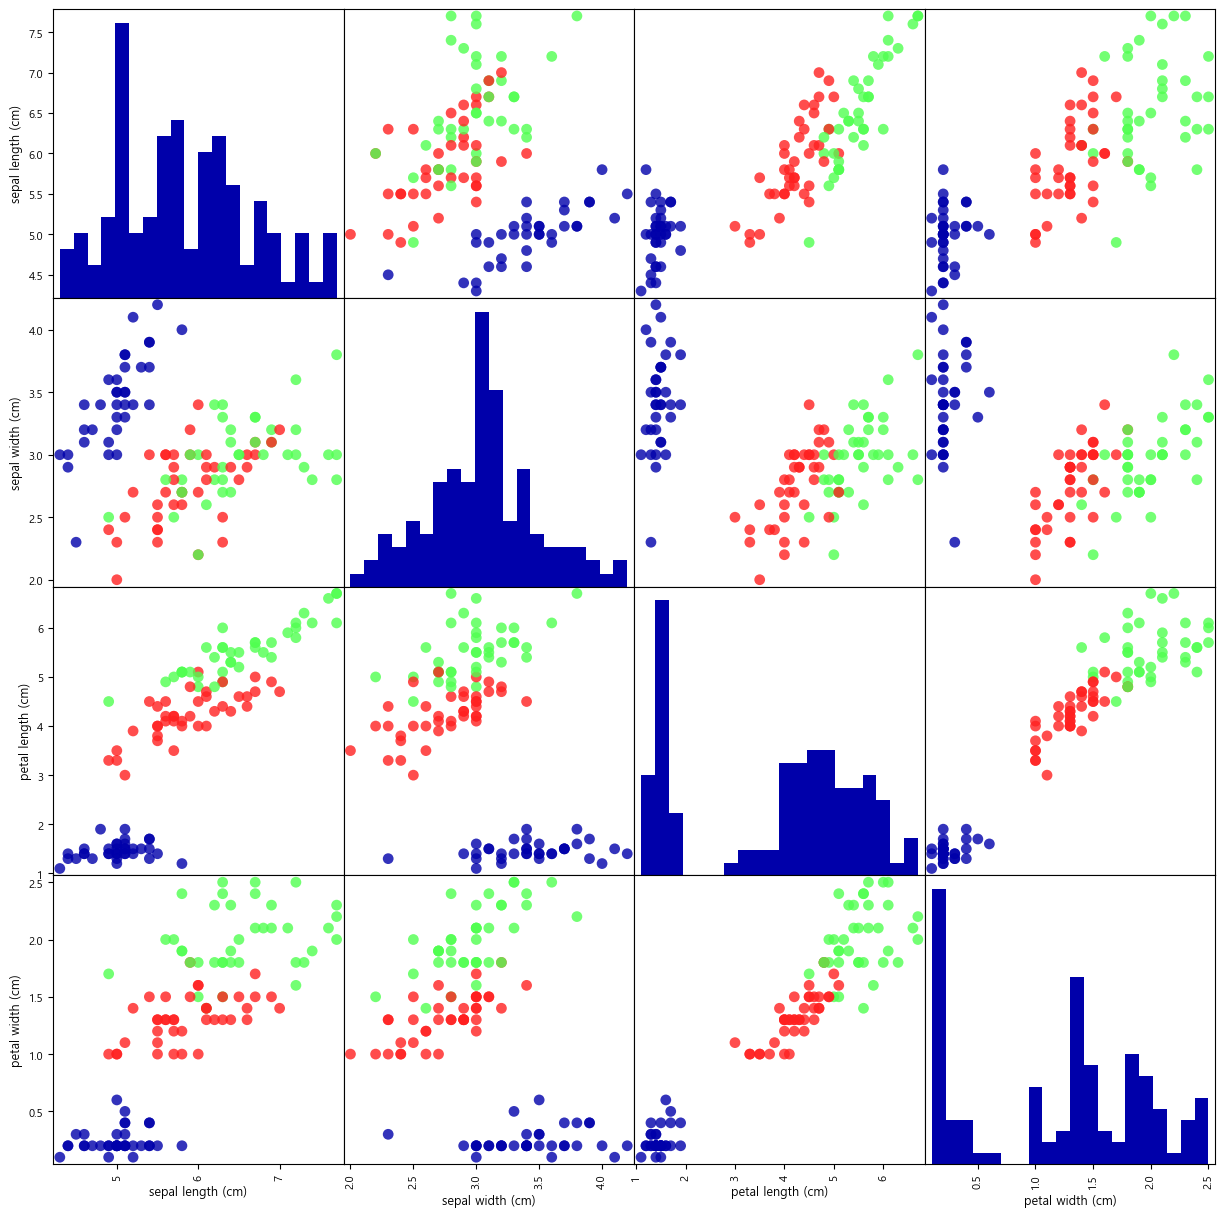

In [18]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(
    iris_dataframe,
    c=y_train,
    figsize=(15, 15),
    marker="o",
    hist_kwds={"bins": 20},
    s=60,
    alpha=0.8,
    cmap=mglearn.cm3,
)
plt.show()

## 3. 머신 러닝 모델: k-최근접 이웃

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## 4. 모델 평가하기

In [21]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n", y_pred)

테스트 세트에 대한 예측값:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [22]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 1.00


In [23]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 1.00
